In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
!pip install tensorflow==2.0.0

  Using cached tensorflow-2.0.0-cp37-cp37m-win_amd64.whl (48.1 MB)
  Using cached gast-0.2.2-cp37-none-any.whl
  Using cached tensorboard-2.0.2-py3-none-any.whl (3.8 MB)
  Using cached tensorflow_estimator-2.0.1-py2.py3-none-any.whl (449 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 1.14.0 requires tensorboard<1.15.0,>=1.14.0, but you have tensorboard 2.0.2 which is incompatible.
tensorflow-gpu 1.14.0 requires tensorflow-estimator<1.15.0rc0,>=1.14.0rc0, but you have tensorflow-estimator 2.0.1 which is incompatible.
tensorflow-addons 0.7.1 requires tensorflow>=2.1.0, but you have tensorflow 2.0.0 which is incompatible.
rasa 1.10.1 requires cloudpickle<1.4,>=1.2, but you have cloudpickle 1.4.1 which is incompatible.
rasa 1.10.1 requires packaging<19.1,>=19.0, but you have packaging 20.3 which is incompatible.
rasa 1.10.1 requires prompt-toolkit<3.0,>=2.0, but you have prompt-toolkit 3.0.5 which is incompatible.
rasa 1.10.1 requires pytz<2020.0,>=2019.1, but you have pytz 2020.1 which is incompatible.
rasa 1.10.1 requires ruamel.yaml<0.17,>=0.16, but you have ruamel-yaml 0.15.87 w

In [2]:
!pip install nltk

In [4]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

Put the hyparameters at the top like this to make it easier to change and edit.

In [5]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

First, let's define two lists that containing articles and labels. In the meantime, we remove stopwords.

In [6]:
articles = []
labels = []

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


In [33]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [31]:
articles

['tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companie

In [32]:
labels

['sport', 'bussiness', 'politics', 'tech', 'entertainment', 'unknown']

There are only 2,225 articles in the data. Then we split into training set and validation set, according to the parameter we set earlier, 80% for training, 20% for validation.

In [7]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


In [34]:
train_articles

['tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companie

In [35]:
train_labels

['tech',
 'business',
 'sport',
 'sport',
 'entertainment',
 'politics',
 'politics',
 'sport',
 'sport',
 'entertainment',
 'entertainment',
 'business',
 'business',
 'politics',
 'sport',
 'business',
 'politics',
 'sport',
 'business',
 'tech',
 'tech',
 'tech',
 'sport',
 'sport',
 'tech',
 'sport',
 'entertainment',
 'tech',
 'politics',
 'entertainment',
 'politics',
 'tech',
 'entertainment',
 'entertainment',
 'business',
 'politics',
 'tech',
 'entertainment',
 'politics',
 'business',
 'politics',
 'sport',
 'business',
 'sport',
 'tech',
 'entertainment',
 'politics',
 'politics',
 'politics',
 'business',
 'sport',
 'politics',
 'business',
 'business',
 'sport',
 'politics',
 'business',
 'sport',
 'sport',
 'business',
 'business',
 'sport',
 'business',
 'sport',
 'business',
 'tech',
 'business',
 'entertainment',
 'tech',
 'business',
 'politics',
 'business',
 'politics',
 'sport',
 'business',
 'tech',
 'business',
 'sport',
 'sport',
 'business',
 'business',
 'spo

Tokenizer does all the heavy lifting for us. In our articles that it was tokenizing, it will take 5,000 most common words. oov_token is to put a special value in when an unseen word is encountered. This means I want "OOV" in bracket to be used to for words that are not in the word index. "fit_on_text" will go through all the text and create dictionary like this:

In [8]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [37]:
vocab_size

5000

In [36]:
word_index

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10,
 'could': 11,
 'last': 12,
 'first': 13,
 'time': 14,
 'two': 15,
 'government': 16,
 'world': 17,
 'uk': 18,
 'best': 19,
 'years': 20,
 'make': 21,
 'film': 22,
 'told': 23,
 'made': 24,
 'get': 25,
 'music': 26,
 'game': 27,
 'like': 28,
 'back': 29,
 'many': 30,
 '000': 31,
 'labour': 32,
 'three': 33,
 'well': 34,
 '1': 35,
 'next': 36,
 'bbc': 37,
 'take': 38,
 'set': 39,
 'number': 40,
 'added': 41,
 'way': 42,
 'market': 43,
 '2': 44,
 'company': 45,
 'may': 46,
 'says': 47,
 'election': 48,
 'home': 49,
 'party': 50,
 'good': 51,
 'going': 52,
 'much': 53,
 'work': 54,
 '2004': 55,
 'still': 56,
 'win': 57,
 'show': 58,
 'think': 59,
 'games': 60,
 'go': 61,
 'top': 62,
 'second': 63,
 'million': 64,
 '6': 65,
 'england': 66,
 'firm': 67,
 'since': 68,
 'week': 69,
 'say': 70,
 'play': 71,
 'part': 72,
 'public': 73,
 'use': 74,
 'blair': 75,
 '3': 76,
 'want'

You can see that "OOV" in bracket is number 1, "said" is number 2, "mr" is number 3, and so on.

In [9]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

This process cleans up our text, lowercase, and remove punctuations.

After tokenization, the next step is to turn thoes tokens into lists of sequence.

In [10]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

This is the 11th article in the training data that has been turned into sequences.

In [11]:
print(train_sequences[10])

[2432, 1, 225, 4995, 22, 641, 587, 225, 4995, 1, 1, 1664, 1, 1, 2432, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2308, 1, 1145, 1695, 1, 1722, 4996, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4515, 1, 2, 2874, 1506, 352, 4739, 1, 52, 341, 1, 352, 2174, 3962, 41, 22, 3793, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4740, 1, 365, 22, 1, 787, 2368, 1, 4302, 138, 10, 1, 3664, 682, 3531, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 600, 1, 1695, 1021, 1, 4997, 807, 1865, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1609, 4998, 542, 492, 1, 1445, 4741, 778, 1320, 1, 1862, 10, 33, 641, 319, 1, 62, 478, 564, 301, 1507, 22, 479, 1, 1, 1667, 1, 797, 1, 3067, 1, 1365, 6, 1, 2432, 564, 22, 2971, 4735, 1, 1, 1, 1, 1, 850, 39, 1826, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4303, 247]


When we train neural networks for NLP, we need sequences to be in the same size, that's why we use padding. Our max_length is 200, so we use pad_sequences to make all of our articles the same length which is 200 in my example. That's why you see that the 1st article was 426 in length, becomes 200, the 2nd article was 192 in length, becomes 200, and so on.

In [42]:
len(train_sequences[10])
#len(train_sequences[60])
#len(train_sequences[0])

284

In [12]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [43]:
train_padded[23]

array([2439, 1198,    1,  339, 3804,  790, 3266, 3267,    1, 2439,   11,
         99,  417, 2425,  339, 1540,  281,  111, 2803,  392, 1222, 3805,
         66, 2431, 1145,  251, 4528,  286,  149,    1,  200,  103,   99,
        417,  772,  878,    2, 3267,  558,  336,    1,  201, 1426,  240,
        127, 1444, 1697,   36,   69,  240, 1444,  166,  222,  392, 2439,
          6, 3284, 3180,  402,  286,  281, 2076,  926,    1,    1,    1,
        329, 3406,    1,    1,  103,  115, 1368, 3180,    1,    1, 2889,
          1, 3267,  399,  350,  773,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [44]:
train_padded[4]

array([4507,    1,    1,  657,  206, 4507,    1, 1036,    1, 2795, 1339,
       1236,    1,    1,    1, 4985, 3160,  823, 1306,   40,   10,    9,
        657,  206,  658,  172,  675, 2629,    1,  644, 2307,  109,  130,
       1860, 2362, 2795, 1694,    1, 2630,  322, 2631,   33,  315,    1,
        360,  152, 3382,   12,   69,   40,   10,  209,    1,  145,  133,
          1,    1,    1,    1,   63,  256,  645, 1861, 4114, 2112,    1,
         62,   85, 3659,    1,    1, 2427, 1339, 1785, 4298, 4115,  722,
        585,    1, 4507,    1,  657,  206, 3161, 3660,  534,  235,  648,
        276,  593,    9,   33,  319,  263, 2965,    1, 2795,    1,  445,
        485,    1, 4507,    1,  172, 3269, 1861,    1, 2629,  648,  644,
          1,    1, 2629,  468, 4731, 3527,   22, 1339, 2113,    1,    1,
       2566, 4507,    1, 1786,  659,  337,  122, 1583,    1,    1, 2632,
       1307,  142, 2795,    1,    1,    1, 3160, 1628,    1,  894,    1,
          1,    1,    1,    1,  586, 3383,  831,  2

In [13]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

426
200
192
200
186
200


In addtion, there is padding type and truncating type, there are all "post". Means for example, for the 11th article, it was 186 in length, we padded to 200, and we padded at the end, add 14 zeros.

In [14]:
print(train_sequences[10])

[2432, 1, 225, 4995, 22, 641, 587, 225, 4995, 1, 1, 1664, 1, 1, 2432, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2308, 1, 1145, 1695, 1, 1722, 4996, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4515, 1, 2, 2874, 1506, 352, 4739, 1, 52, 341, 1, 352, 2174, 3962, 41, 22, 3793, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4740, 1, 365, 22, 1, 787, 2368, 1, 4302, 138, 10, 1, 3664, 682, 3531, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 600, 1, 1695, 1021, 1, 4997, 807, 1865, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1609, 4998, 542, 492, 1, 1445, 4741, 778, 1320, 1, 1862, 10, 33, 641, 319, 1, 62, 478, 564, 301, 1507, 22, 479, 1, 1, 1667, 1, 797, 1, 3067, 1, 1365, 6, 1, 2432, 564, 22, 2971, 4735, 1, 1, 1, 1, 1, 850, 39, 1826, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4303, 247]


In [15]:
print(train_padded[10])

[2432    1  225 4995   22  641  587  225 4995    1    1 1664    1    1
 2432   22  564    1    1  140  278    1  140  278  796  822  662 2308
    1 1145 1695    1 1722 4996    1    1    1    1    1 4738    1    1
  122 4515    1    2 2874 1506  352 4739    1   52  341    1  352 2174
 3962   41   22 3793    1    1    1    1  542    1    1    1  835  631
 2367  347 4740    1  365   22    1  787 2368    1 4302  138   10    1
 3664  682 3531    1   22    1  414  822  662    1   90   13  633    1
  225 4995    1  600    1 1695 1021    1 4997  807 1865  117    1    1
    1 2974   22    1   99  278    1 1609 4998  542  492    1 1445 4741
  778 1320    1 1862   10   33  641  319    1   62  478  564  301 1507
   22  479    1    1 1667    1  797    1 3067    1 1365    6    1 2432
  564   22 2971 4735    1    1    1    1    1  850   39 1826  675  297
   26  979    1  882   22  361   22   13  301 1507 1343  374   20   63
  883 1096 4303  247    0    0    0    0    0    0    0    0    0    0
    0 

And for the 1st article, it was 426 in length, we truncated to 200, and we truncated at the end.

In [16]:
print(train_sequences[0])

[91, 160, 1142, 1107, 49, 979, 755, 1, 89, 1304, 4289, 129, 175, 3653, 1215, 1196, 1578, 42, 7, 893, 91, 1, 334, 85, 20, 14, 130, 3262, 1216, 2422, 569, 451, 1376, 58, 3378, 3521, 1662, 8, 921, 730, 10, 844, 1, 9, 598, 1579, 1108, 395, 1941, 1107, 731, 49, 537, 1399, 2012, 1624, 134, 249, 113, 2356, 795, 4980, 980, 584, 10, 3956, 3957, 921, 2563, 129, 344, 175, 3653, 1, 1, 39, 62, 2867, 28, 9, 4723, 18, 1305, 136, 416, 7, 143, 1424, 71, 4502, 436, 4981, 91, 1108, 77, 1, 82, 2013, 53, 1, 91, 6, 1008, 599, 89, 1304, 91, 1964, 131, 137, 420, 9, 2868, 38, 152, 1234, 89, 1304, 4724, 7, 436, 4981, 3154, 6, 2493, 1, 431, 1127, 1, 1425, 570, 1261, 1903, 1, 766, 9, 537, 1399, 2012, 134, 2070, 400, 845, 1965, 1602, 34, 1718, 2869, 1, 1, 2423, 244, 9, 2625, 82, 732, 6, 1173, 1197, 152, 720, 591, 1, 124, 28, 1305, 1691, 432, 83, 933, 115, 20, 14, 18, 3155, 1, 37, 1485, 1, 23, 37, 87, 335, 2357, 37, 467, 255, 1965, 1359, 328, 1, 299, 732, 1174, 18, 2870, 1718, 1, 294, 756, 1074, 395, 2014, 387, 431

In [17]:
print(train_padded[0])

[  91  160 1142 1107   49  979  755    1   89 1304 4289  129  175 3653
 1215 1196 1578   42    7  893   91    1  334   85   20   14  130 3262
 1216 2422  569  451 1376   58 3378 3521 1662    8  921  730   10  844
    1    9  598 1579 1108  395 1941 1107  731   49  537 1399 2012 1624
  134  249  113 2356  795 4980  980  584   10 3956 3957  921 2563  129
  344  175 3653    1    1   39   62 2867   28    9 4723   18 1305  136
  416    7  143 1424   71 4502  436 4981   91 1108   77    1   82 2013
   53    1   91    6 1008  599   89 1304   91 1964  131  137  420    9
 2868   38  152 1234   89 1304 4724    7  436 4981 3154    6 2493    1
  431 1127    1 1425  570 1261 1903    1  766    9  537 1399 2012  134
 2070  400  845 1965 1602   34 1718 2869    1    1 2423  244    9 2625
   82  732    6 1173 1197  152  720  591    1  124   28 1305 1691  432
   83  933  115   20   14   18 3155    1   37 1485    1   23   37   87
  335 2357   37  467  255 1965 1359  328    1  299  732 1174   18 2870
 1718 

Then we do the same for the validation sequences. Note that we should expect more out of vocabulary words from validation articles because word index were derived from the training articles.

In [18]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


Now we are going to look at the labels. because our labels are text, so we will tokenize them, when training, labels are expected to be numpy arrays. So we will turn list of labels into numpy arrays like so:

In [19]:
print(set(labels))

{'politics', 'business', 'tech', 'sport', 'entertainment'}


In [20]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [45]:
training_label_seq

array([[4],
       [2],
       [1],
       ...,
       [1],
       [2],
       [5]])

In [21]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


Before training deep neural network, we want to explore what our original article and article after padding look like. Running the following code, we explore the 11th article, we can see that some words become "OOV", because they did not make to the top 5,000.

In [22]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

Now we can implement LSTM. Here is my code that I build a tf.keras.Sequential model and start with an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices into sequences of vectors. After training, words with similar meanings often have the similar vectors.

Next is how to implement LSTM in code. The Bidirectional wrapper is used with a LSTM layer, this propagates the input forwards and backwards through the LSTM layer and then concatenates the outputs. This helps LSTM to learn long term dependencies. We then fit it to a dense neural network to do classification.

This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a tf.keras.layers.Dense layer.

In [47]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,return_sequences=True)),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 390       
Total params: 592,326
Trainable params: 592,326
Non-trainable params: 0
________________________________________________

In our model summay, we have our embeddings, our Bidirectional contains LSTM, followed by two dense layers. The output from Bidirectional is 128, because it doubled what we put in LSTM. We can also stack LSTM layer but I found the results worse.

In [48]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
num_epochs = 50
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/50
56/56 - 22s - loss: 0.0396 - accuracy: 0.9910 - val_loss: 0.3555 - val_accuracy: 0.9079
Epoch 2/50
56/56 - 22s - loss: 0.0887 - accuracy: 0.9770 - val_loss: 0.2783 - val_accuracy: 0.9101
Epoch 3/50
56/56 - 22s - loss: 0.0387 - accuracy: 0.9921 - val_loss: 0.2839 - val_accuracy: 0.9213
Epoch 4/50
56/56 - 24s - loss: 0.0194 - accuracy: 0.9961 - val_loss: 0.3071 - val_accuracy: 0.9169
Epoch 5/50
56/56 - 23s - loss: 0.0368 - accuracy: 0.9916 - val_loss: 0.3483 - val_accuracy: 0.8966
Epoch 6/50
56/56 - 22s - loss: 0.0089 - accuracy: 0.9989 - val_loss: 0.3393 - val_accuracy: 0.9191
Epoch 7/50
56/56 - 23s - loss: 0.0116 - accuracy: 0.9983 - val_loss: 0.3449 - val_accuracy: 0.9101
Epoch 8/50
56/56 - 24s - loss: 0.0062 - accuracy: 0.9989 - val_loss: 0.3302 - val_accuracy: 0.9191
Epoch 9/50
56/56 - 23s - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.3394 - val_accuracy: 0.9236
Epoch 10/50
56/56 - 23s - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.3386 - val_accuracy: 0.9236
Epoch 11/

In [26]:
!pip install matplotlib

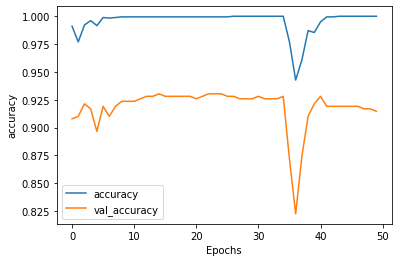

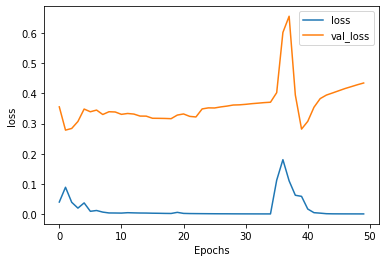

In [51]:
from matplotlib import pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [52]:
txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
pred

array([[1.6509604e-07, 9.9992263e-01, 5.1847741e-07, 3.4660050e-06,
        2.1058469e-07, 7.3066789e-05]], dtype=float32)

In [53]:
txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment','unknown']
print(pred, labels[np.argmax(pred)])

[[1.6509604e-07 9.9992263e-01 5.1847741e-07 3.4660050e-06 2.1058469e-07
  7.3066789e-05]] bussiness


In [54]:
np.argmax(pred)

1

In [56]:
txt=["halo 2 heralds traffic explosion the growing popularity of online gaming could spell problems for net service firms  warns network monitoring company sandvine.  it issued the warning following analysis which shows "]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment','unknown']
print(pred, labels[np.argmax(pred)])
model.save('testlstm.h5')
#cole faces lengthy injury lay-off aston villa s carlton cole could be out for six weeks with a knee injury.  the striker  who is on a season-long loan from chelsea  picked up the knock in an england under-21 match 

[[9.8611781e-06 9.5033717e-01 2.7946854e-04 7.2919858e-05 2.5195023e-03
  4.6781048e-02]] bussiness


In [57]:
pwd

'C:\\Users\\z014413\\Desktop\\Ramesh\\rnnlstm'